In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
#data = mne.io.read_raw_edf("../Dataset/Mahnob/data/Sessions/10/Part_1_S_Trial5_emotion.bdf")

In [2]:
# dir(data)
ids = [10, 160, 426, 546, 814, 948, 1206, 1588, 1698, 1956, 2090, 2224, \
       2358, 2492, 2626, 2760, 2894, 3028, 3412, 3538, 3664, 3790]
files = map(mne.io.read_raw_edf, [ glob.glob("../Dataset/Mahnob/data/Sessions/{}/*.bdf".format(_id))[0] for _id in ids])

Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/10/Part_1_S_Trial5_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/160/Part_2_S_Trial15_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/426/Part_4_S_Trial18_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/546/Part_5_S_Trial13_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/814/Part_7_S_Trial17_emotion.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from ../Dataset/Mahnob/data/Sessions/948/Part_8_S_Trial19_emotion.

In [3]:
for f in files:
    print f

<RawEDF  |  Part_1_S_Trial5_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_2_S_Trial15_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_4_S_Trial18_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_5_S_Trial13_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_7_S_Trial17_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_8_S_Trial19_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_10_S_Trial18_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_13_S_Trial14_emotion.bdf, n_channels x n_times : 47 x 42496 (166.0 sec), ~102 kB, data not loaded>
<RawEDF  |  Part_14_S_Trial4_emotion.bdf, n_channels x n_times : 47 x 42496 (16

In [10]:
status = []
for f in files:
    status.append(f.copy().load_data().pick_channels(['STI 014']).get_data(0).flatten())

Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 secs...
Reading 0 ... 42495  =      0.000 ...   165.996 

In [13]:
for s in status:
    #s *= 1/np.max(s)
    _s = np.diff(s)
    start, stop = np.where(_s > 1)[0]
    print start, stop
    

7679 34569
7679 34593
7679 34577
7679 34582
7679 34590
7679 34577
7679 34598
7679 34574
7679 34573
7679 34569
7679 34569
7679 34590
7679 34586
7679 34594
7679 34594
7679 34569
7679 34573
7679 34594
7679 34573
7679 34569
7679 34590
7679 34569


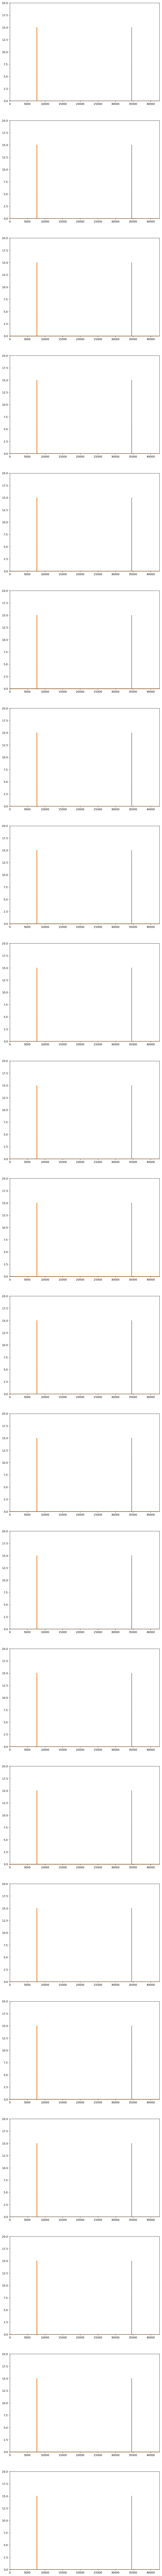

In [12]:
dpi = 100

ncols=1
nrows=len(ids)

# determine the figure size in inches
figsize = (1024*ncols/dpi, 800*nrows/dpi)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, dpi=dpi)

for ax, st in zip(axes.flat[0:], status):
    ax.axis([0, st.shape[0], 0, 20])
    ax.plot(st)
    ax.plot(np.diff(st))
    
    
plt.show()